# Step 1: Import libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 2: Load the Clean Dataset => df represents dataframe

In [14]:
df = pd.read_csv("../data/processed/clean_telco.csv")
df[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7.032000e+03,7032.000000
mean,-1.202426e-16,64.798208
std,1.000071e+00,30.085974
min,-1.280248e+00,18.250000
25%,-9.542963e-01,35.587500
50%,-1.394171e-01,70.350000
75%,9.199259e-01,89.862500
max,1.612573e+00,118.750000


# STEP 3: Define Features (X) and Target (y)

In [24]:
X = df[['tenure']]  # must be 2D
y = df['MonthlyCharges']

# STEP 4.0: Split - randomly split your data into train/test parts

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 4.1 Previewing Train/Test Split – Real Examples of the outcome of STEP 4.0
# View the first few rows of X_train and y_train
# This lets us verify that the features/columns and targets align correctly and are ready for model training

In [26]:
print("🔹 X_train sample:")
print(X_train.head())

print("\n🔹 y_train sample:")
print(y_train.head())

# Check X_test and y_test as well
print("\n🔸 X_test sample:")
print(X_test.head())

print("\n🔸 y_test sample:")
print(y_test.head())


🔹 X_train sample:
        tenure
6021  0.430998
3404 -1.198760
5474  0.919926
5515  0.512486
6328  0.919926

🔹 y_train sample:
6021     49.05
3404     53.40
5474     77.75
5515     54.65
6328    100.90
Name: MonthlyCharges, dtype: float64

🔸 X_test sample:
        tenure
2476  1.164390
6773 -0.546857
6116 -0.791321
3047  0.186535
4092 -1.076528

🔸 y_test sample:
2476     25.00
6773     24.70
6116    102.25
3047     55.05
4092     29.45
Name: MonthlyCharges, dtype: float64


# STEP 5: Train the Model (Fit θ₀, θ₁)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# STEP 6: Predict and Visualize

In [28]:
y_pred = model.predict(X_test)

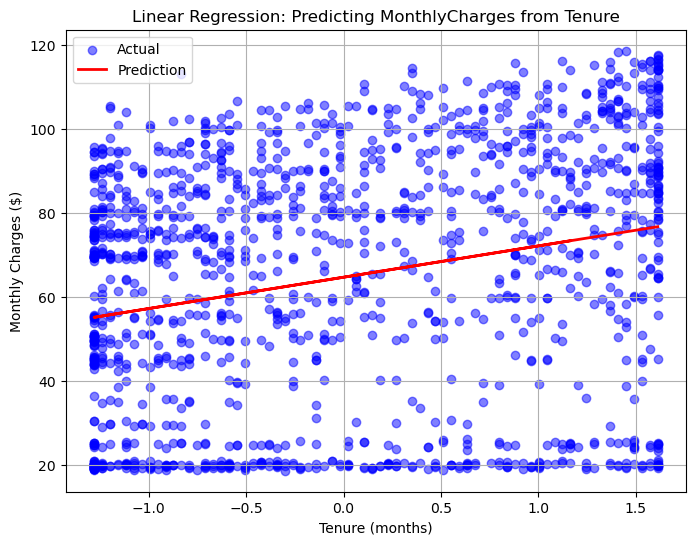

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediction")
plt.title("Linear Regression: Predicting MonthlyCharges from Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Charges ($)")
plt.legend()
plt.grid(True)
plt.show()

# STEP 7: Evaluate the Model (Test Set)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print("Intercept (θ₀):", model.intercept_)
print("Coefficient (θ₁):", model.coef_[0])

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Intercept (θ₀): 64.72369021515979
Coefficient (θ₁): 7.450997973818354
Mean Squared Error (MSE): 830.1524318957313
R² Score: 0.060672142125989925
